# DBSCAN Project  

## The Data


Source: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

Margarida G. M. S. Cardoso, margarida.cardoso '@' iscte.pt, ISCTE-IUL, Lisbon, Portugal


Data Set Information:

Provide all relevant information about your data set.


Attribute Information:

    1) FRESH: annual spending (m.u.) on fresh products (Continuous);
    2) MILK: annual spending (m.u.) on milk products (Continuous);
    3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
    4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
    5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
    6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
    7) CHANNEL: customers  Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
    8) REGION: customers  Region Lisnon, Oporto or Other (Nominal)
 

Relevant Papers:

Cardoso, Margarida G.M.S. (2013). Logical discriminant models â€“ Chapter 8 in Quantitative Modeling in Marketing and Management Edited by Luiz Moutinho and Kun-Huang Huarng. World Scientific. p. 223-253. ISBN 978-9814407717

Jean-Patrick Baudry, Margarida Cardoso, Gilles Celeux, Maria JosÃ© Amorim, Ana Sousa Ferreira (2012). Enhancing the selection of a model-based clustering with external qualitative variables. RESEARCH REPORT NÂ° 8124, October 2012, Project-Team SELECT. INRIA Saclay - ÃŽle-de-France, Projet select, UniversitÃ© Paris-Sud 11



-----

## DBSCAN and Clustering Examples

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('wholesome_customers_data.csv')

In [5]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


#### changing nominal type of features channgel and region into dummy variables

In [7]:
# changing int64 dtype channgel and region features into objects
df["Channel"] = df["Channel"].astype(object)
df["Region"] = df["Region"].astype(object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Channel           440 non-null    object
 1   Region            440 non-null    object
 2   Fresh             440 non-null    int64 
 3   Milk              440 non-null    int64 
 4   Grocery           440 non-null    int64 
 5   Frozen            440 non-null    int64 
 6   Detergents_Paper  440 non-null    int64 
 7   Delicassen        440 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 27.6+ KB


In [9]:
df = pd.get_dummies(df)
df.head()

/home/mete/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


## EDA

**TASK: Create a scatterplot showing the relation between MILK and GROCERY spending, colored by Channel column.**

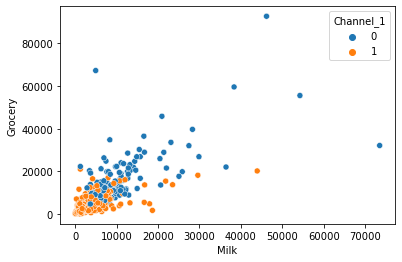

In [10]:
sns.scatterplot(data=df, x="Milk", y="Grocery", hue="Channel_1");

**TASK: Use seaborn to create a histogram of MILK spending, colored by Channel. Can you figure out how to use seaborn to "stack" the channels, instead of have them overlap?**

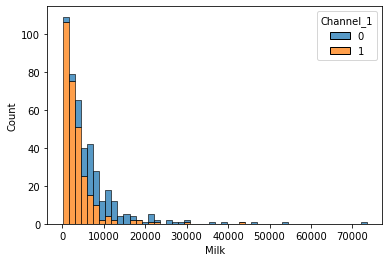

In [11]:
sns.histplot(data=df, x="Milk", hue="Channel_1", multiple="stack");

**TASK: Create an annotated clustermap of the correlations between spending on different cateogires.**

In [12]:
df.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen',
       'Channel_1', 'Channel_2', 'Region_1', 'Region_2', 'Region_3'],
      dtype='object')

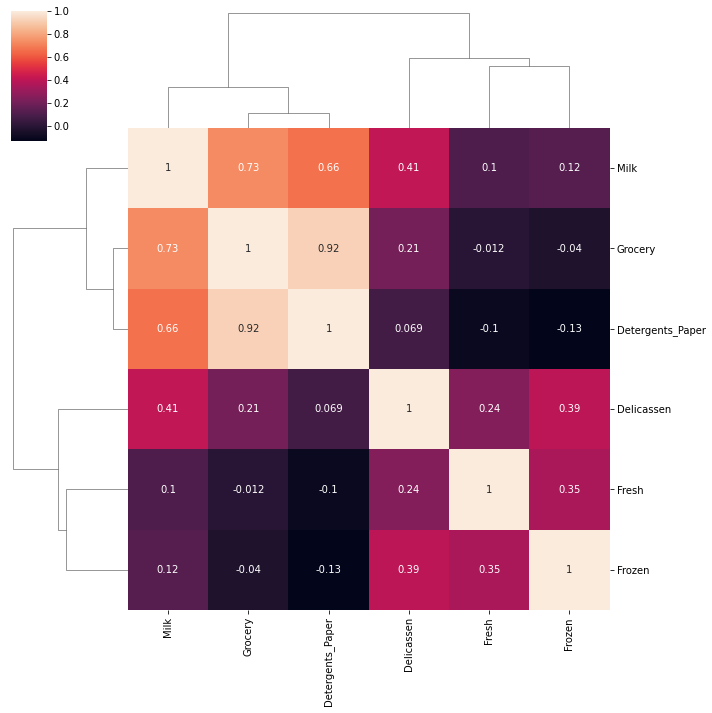

In [13]:
sns.clustermap(data=df.drop(labels=['Channel_1', 'Channel_2', 'Region_1', 'Region_2', 'Region_3'],
                axis=1).corr(), annot=True);

**TASK: Create a PairPlot of the dataframe, colored by Region.**

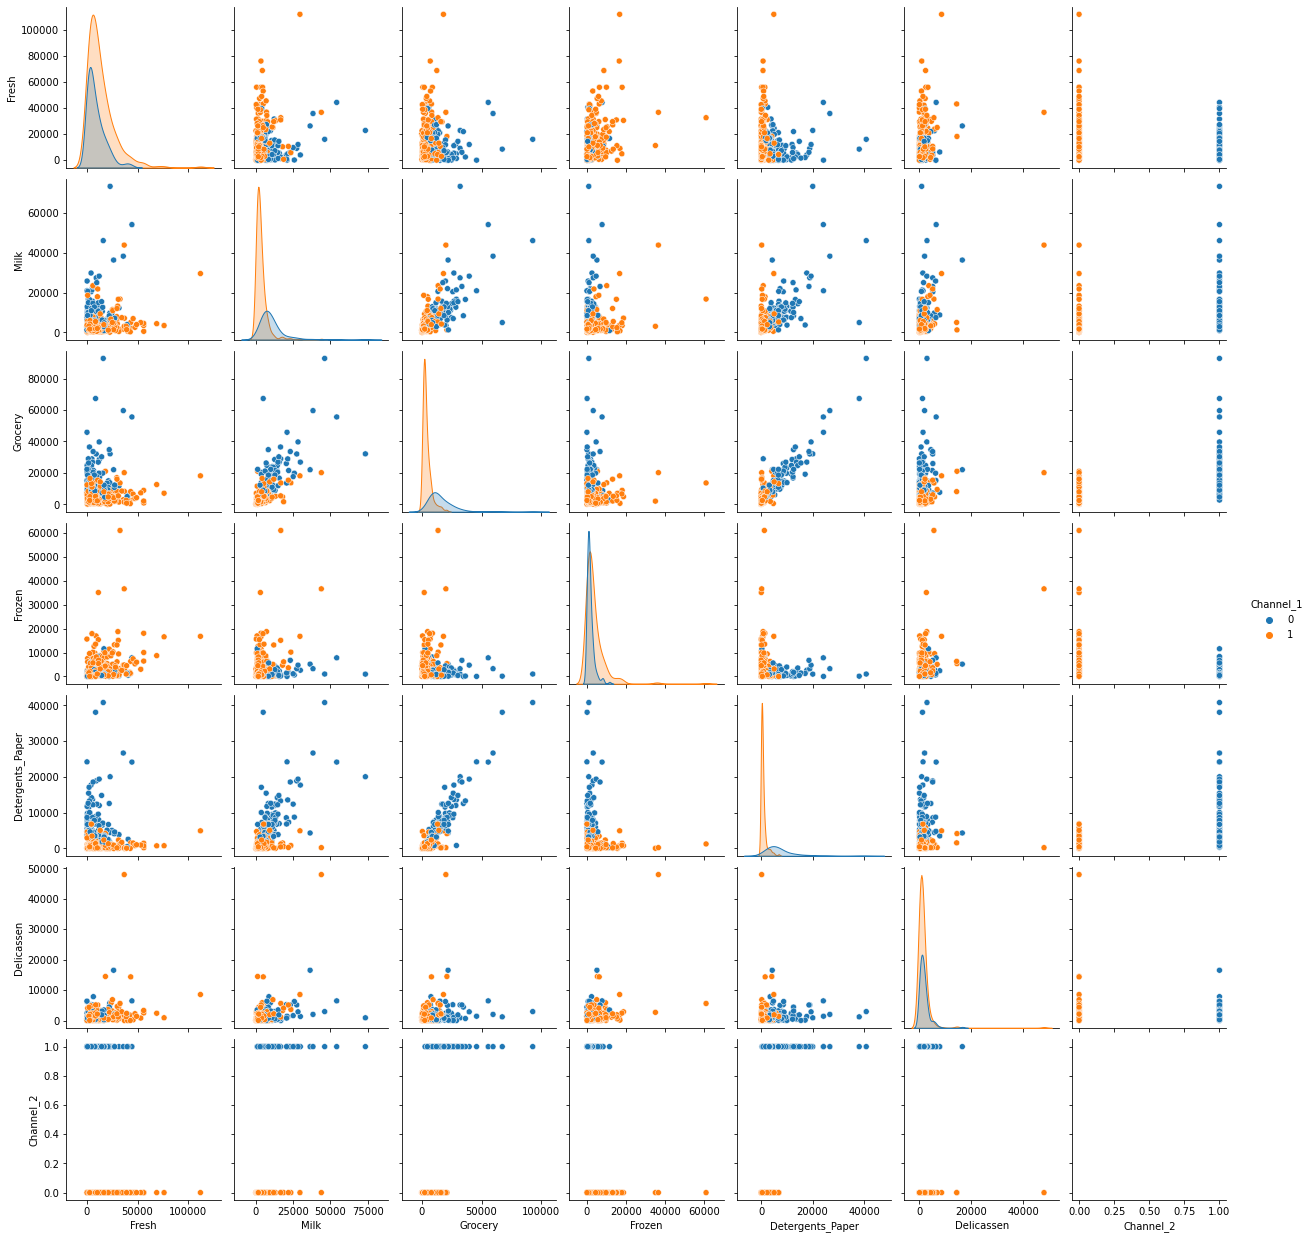

In [14]:
sns.pairplot(data=df.drop(labels=['Region_1', 'Region_2', 'Region_3'], axis=1),
            hue='Channel_1');

## DBSCAN

**TASK: Since the values of the features are in different orders of magnitude, let's scale the data. Use StandardScaler to scale the data.**

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [16]:
scaled_data

array([[ 0.05293319,  0.52356777, -0.04111489, ..., -0.46056619,
        -0.34582203,  0.62642243],
       [-0.39130197,  0.54445767,  0.17031835, ..., -0.46056619,
        -0.34582203,  0.62642243],
       [-0.44702926,  0.40853771, -0.0281571 , ..., -0.46056619,
        -0.34582203,  0.62642243],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, ..., -0.46056619,
        -0.34582203,  0.62642243],
       [-0.13538389, -0.51753572, -0.60251388, ..., -0.46056619,
        -0.34582203,  0.62642243],
       [-0.72930698, -0.5559243 , -0.57322717, ..., -0.46056619,
        -0.34582203,  0.62642243]])

**TASK: Use DBSCAN and a for loop to create a variety of models testing different epsilon values. Set min_samples equal to 2 times the number of features. During the loop, keep track of and log the percentage of points that are outliers. For reference the solutions notebooks uses the following range of epsilon values for testing:**

    np.linspace(0.001,3,50)

In [17]:
from sklearn.cluster import DBSCAN

In [18]:
outliers_pers = []

for eps in np.linspace(0.001,3,50):
    
    # modeling and fitting
    model = DBSCAN(eps=eps, min_samples=2*scaled_data.shape[1])
    model.fit(scaled_data)
    
    # calculating number of outliers
    perc_outliers = 100 * np.sum(model.labels_ == -1) / len(model.labels_)
    
    # appending percentage of outliers to percentage list
    outliers_pers.append(perc_outliers)

**TASK: Create a line plot of the percentage of outlier points versus the epsilon value choice.**

In [19]:
# checking outliers percantage changing
pd.Series(outliers_pers).diff()

0           NaN
1      0.000000
2      0.000000
3      0.000000
4      0.000000
5      0.000000
6     -7.500000
7     -8.636364
8     -4.318182
9     -5.000000
10    -2.272727
11    -2.500000
12    -1.590909
13   -12.272727
14    -7.045455
15    -6.818182
16    -6.818182
17    -2.272727
18    -2.500000
19    -2.727273
20    -0.909091
21    -6.136364
22    -0.681818
23    -1.136364
24    -0.227273
25    -0.454545
26    -1.136364
27    -0.681818
28    -1.136364
29    -0.681818
30     0.000000
31     0.000000
32    -0.681818
33    -0.454545
34    -0.227273
35    -0.227273
36     0.000000
37     0.000000
38    -0.454545
39    -0.909091
40     0.000000
41     0.000000
42    -0.227273
43     0.000000
44    -0.227273
45     0.000000
46     0.000000
47     0.000000
48    -0.227273
49     0.000000
dtype: float64

In [20]:
np.linspace(0.001,3,50)[30]

1.8371224489795916

In [21]:
np.linspace(0.001,3,50)[35]

2.1431428571428572

In [22]:
# as seen on diff(), epsilon value 1.83 and 2.14 around 2 and outlier change smooth in this area

/home/mete/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'outliers percentage')

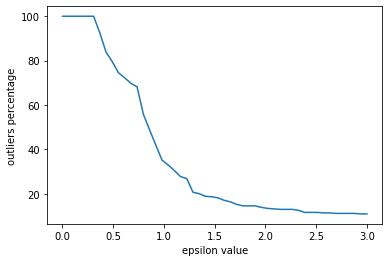

In [23]:
sns.lineplot(np.linspace(0.001,3,50), outliers_pers);
plt.xlabel("epsilon value")
plt.ylabel("outliers percentage")

In [24]:
# it confirmed with visualation too, 2 seems appropiate epsilon value for smoothing

## DBSCAN with Chosen Epsilon

**TASK: Based on the plot created in the previous task, retrain a DBSCAN model with a reasonable epsilon value. Note: For reference, the solutions use eps=2.**

In [25]:
model = DBSCAN(eps=2, min_samples=2*scaled_data.shape[1])
labels = model.fit_predict(scaled_data)

**TASK: Create a scatterplot of Milk vs Grocery, colored by the discovered labels of the DBSCAN model.**

<AxesSubplot:xlabel='Milk', ylabel='Grocery'>

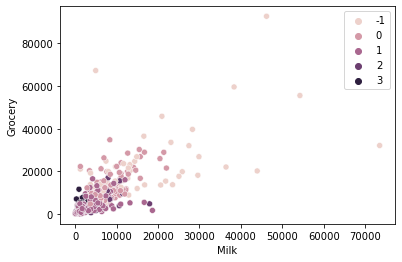

In [26]:
sns.scatterplot(data=df, x="Milk", y="Grocery", hue=labels)

**TASK: Create a scatterplot of Milk vs. Detergents Paper colored by the labels.**

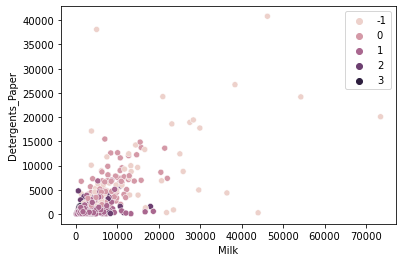

In [27]:
sns.scatterplot(data=df, x="Milk", y="Detergents_Paper", hue=labels);

**TASK: Create a new column on the original dataframe called "Labels" consisting of the DBSCAN labels.**

In [28]:
df["Labels"] = labels

In [29]:
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3,Labels
0,12669,9656,7561,214,2674,1338,0,1,0,0,1,0
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1,0
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1,0
3,13265,1196,4221,6404,507,1788,1,0,0,0,1,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1,0


**TASK: Compare the statistical mean of the clusters and outliers for the spending amounts on the categories.**

In [30]:
df.groupby("Labels").mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
Labels,,,,,,,,,,,
-1,16112.949153,15083.983051,19952.932203,5822.813559,8669.525424,3637.779661,0.220339,0.779661,0.355932,0.338983,0.305085
0,9092.750000,8334.114583,13422.125000,1397.375000,5611.083333,1549.552083,0.000000,1.000000,0.000000,0.000000,1.000000
1,12348.752475,3067.074257,3497.747525,3092.772277,750.935644,1096.049505,1.000000,0.000000,0.000000,0.000000,1.000000
2,11939.589286,3447.196429,3871.821429,2664.714286,959.964286,1085.696429,1.000000,0.000000,1.000000,0.000000,0.000000
3,10870.296296,1767.962963,4053.629630,3703.407407,453.481481,939.111111,1.000000,0.000000,0.000000,1.000000,0.000000


**TASK: Normalize the dataframe from the previous task using MinMaxScaler so the spending means go from 0-1 and create a heatmap of the values.**

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [32]:
normalized_data = scaler.fit_transform(df.drop("Labels", axis=1))

In [33]:
normalized_df = pd.DataFrame(data=normalized_data, columns=df.drop("Labels", axis=1).columns)

In [34]:
normalized_df["Labels"] = labels

In [35]:
scaled_means = normalized_df.groupby("Labels").mean()

In [36]:
scaled_means.loc[-1]

Fresh               0.143649
Milk                0.204635
Grocery             0.215031
Frozen              0.095290
Detergents_Paper    0.212290
Delicassen          0.075819
Channel_1           0.220339
Channel_2           0.779661
Region_1            0.355932
Region_2            0.338983
Region_3            0.305085
Name: -1, dtype: float64

In [37]:
scaled_means

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
Labels,,,,,,,,,,,
-1,0.143649,0.204635,0.215031,0.095290,0.212290,0.075819,0.220339,0.779661,0.355932,0.338983,0.305085
0,0.081051,0.112728,0.144638,0.022556,0.137372,0.032260,0.000000,1.000000,0.000000,0.000000,1.000000
1,0.110084,0.041012,0.037668,0.050420,0.018321,0.022800,1.000000,0.000000,0.000000,0.000000,1.000000
2,0.106436,0.046188,0.041700,0.043385,0.023441,0.022584,1.000000,0.000000,1.000000,0.000000,0.000000
3,0.096901,0.023324,0.043660,0.060456,0.011035,0.019527,1.000000,0.000000,0.000000,1.000000,0.000000


**TASK: Create another heatmap similar to the one above, but with the outliers removed**

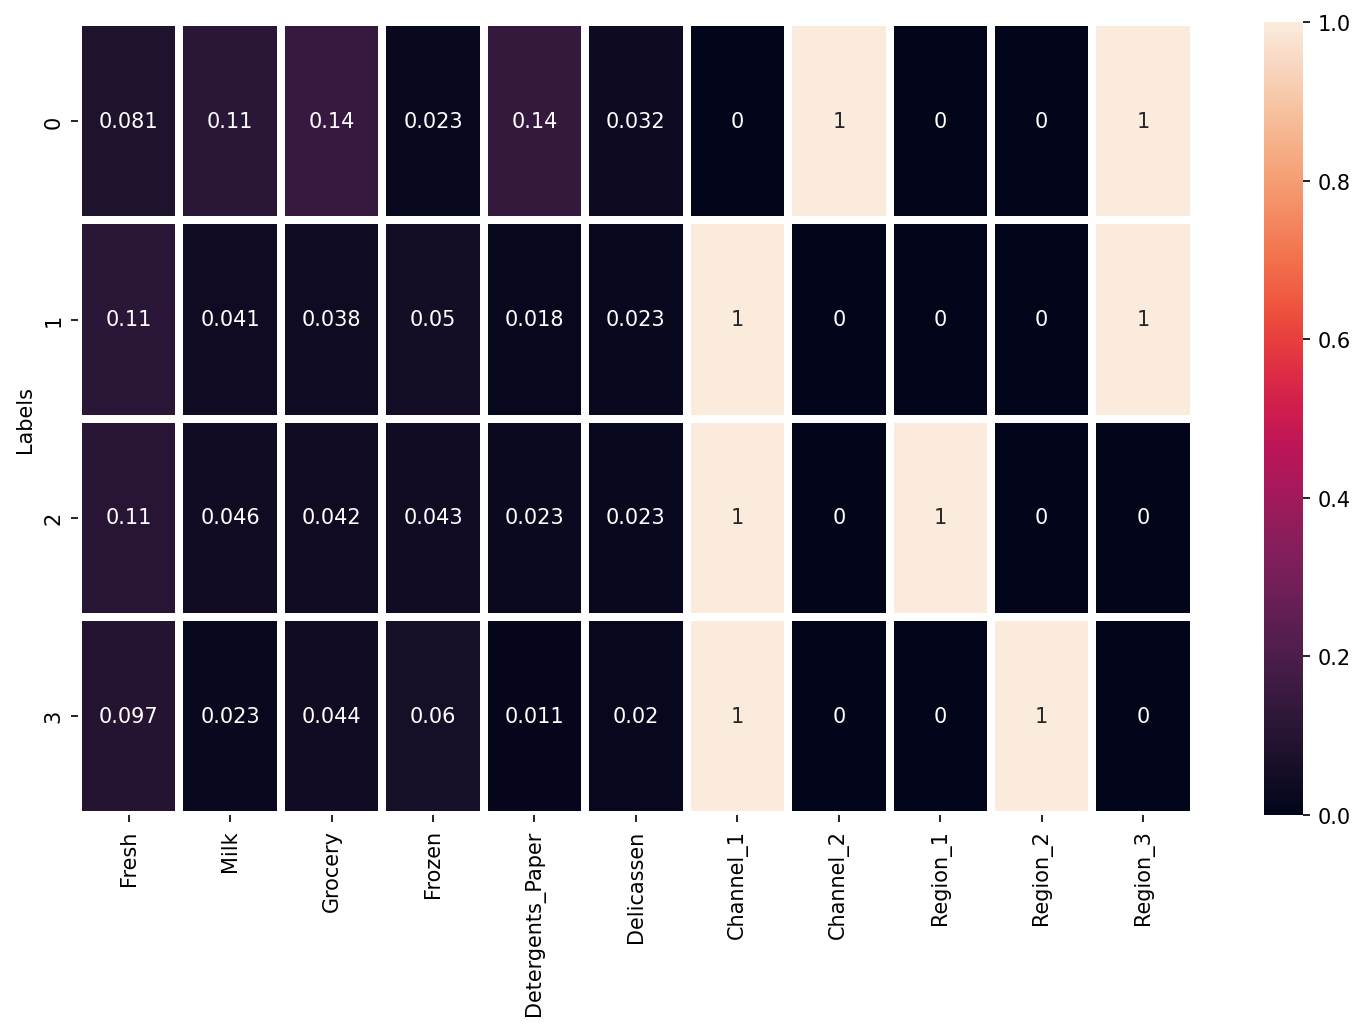

In [38]:
plt.figure(figsize=(12,7), dpi=150)
sns.heatmap(scaled_means.drop(-1), annot=True, linewidth=3, linecolor="white");

**TASK: What spending category were the two clusters mode different in?**

In [39]:
mode = df.groupby("Labels").mean().drop(-1).drop(labels=["Channel_1", "Channel_2", "Region_1", "Region_2", "Region_3"], axis=1)

In [40]:
mode

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
0,9092.750000,8334.114583,13422.125000,1397.375000,5611.083333,1549.552083
1,12348.752475,3067.074257,3497.747525,3092.772277,750.935644,1096.049505
2,11939.589286,3447.196429,3871.821429,2664.714286,959.964286,1085.696429
3,10870.296296,1767.962963,4053.629630,3703.407407,453.481481,939.111111


In [41]:
mode_fresh = mode["Fresh"]
mode_milk = mode["Milk"]
mode_grocery = mode["Grocery"]
mode_frozen = mode["Frozen"]
mode_detergan = mode["Detergents_Paper"]
mode_delicassen = mode["Delicassen"]

In [42]:
mode_fresh.diff()

Labels
0            NaN
1    3256.002475
2    -409.163190
3   -1069.292989
Name: Fresh, dtype: float64

In [43]:
# not milk
mode_milk.diff()

Labels
0            NaN
1   -5267.040326
2     380.122171
3   -1679.233466
Name: Milk, dtype: float64

In [44]:
# not grocery
mode_grocery.diff()

Labels
0            NaN
1   -9924.377475
2     374.073904
3     181.808201
Name: Grocery, dtype: float64

In [45]:
# 1 of answer
mode_frozen.diff()

Labels
0            NaN
1    1695.397277
2    -428.057992
3    1038.693122
Name: Frozen, dtype: float64

In [46]:
# not this as well
mode_detergan.diff()

Labels
0            NaN
1   -4860.147690
2     209.028642
3    -506.482804
Name: Detergents_Paper, dtype: float64

In [47]:
# 1 of answer
mode_delicassen.diff()

Labels
0           NaN
1   -453.502578
2    -10.353076
3   -146.585317
Name: Delicassen, dtype: float64

## delicassen and frozen are most spending category were the two clusters mode different in